In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [12]:
hdu = fits.open('RT.fits')

In [13]:
hdu.info()

Filename: RT.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (1024, 1024, 1, 1, 4)   float32   
  1                1 ImageHDU        10   (1, 1, 1, 2)   float32   
  2                1 ImageHDU         9   (1, 1, 1)   float32   


In [14]:
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    5 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
NAXIS5  =                    4 / length of data axis 5                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WAVE    =                1300. / wavelength [microns]                           
CTYPE1  = 'RA---TAN'        

In [15]:
data = hdu[0].data
data.shape

(4, 1, 1, 1024, 1024)

ciao


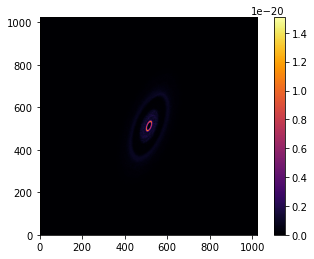

In [37]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

filename='RT.fits'
image_file= get_pkg_data_filename(filename)
image_data = fits.getdata(image_file, ext=0)
data = image_data[0,0,0,:,:] 

ima = plt.imshow(data,origin='lower',cmap='inferno')
plt.colorbar()

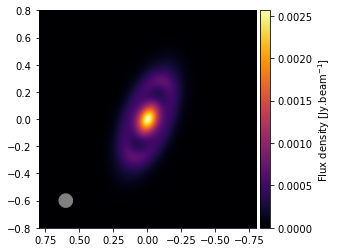

In [39]:
import pymcfost as mcfost
mcfost.__version__
%matplotlib inline
import matplotlib 
from matplotlib.patches import Circle


directory = '../'
image =  mcfost.Image('./data_1300/')

img = image.plot(i=0, bpa=159, bmaj=0.1, bmin=0.1,scale='lin',Jy=True,per_beam=True, no_ylabel=True,no_xlabel=True,plot_stars=False,limits=[0.8,-0.8,-0.8,0.8])

AttributeError: 'Params' object has no attribute 'star'

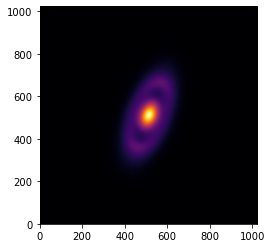

In [18]:
plt.imshow(image.last_image, origin='lower', cmap='inferno')

In [19]:
#l'array coi dati è in 
image.last_image

array([[ 1.10665808e-09,  1.15262664e-09,  1.19929132e-09, ...,
        -1.31158974e-20, -4.36077071e-20, -7.35302166e-21],
       [ 1.14444379e-09,  1.19198154e-09,  1.24023920e-09, ...,
        -1.31683601e-20, -4.40759765e-20, -7.68944714e-21],
       [ 1.18213909e-09,  1.23124225e-09,  1.28108907e-09, ...,
        -1.31376614e-20, -4.44682438e-20, -7.94580405e-21],
       ...,
       [ 1.42982549e-20,  1.55835903e-20, -2.77903257e-21, ...,
         1.26326203e-09,  1.21548379e-09,  1.16830861e-09],
       [ 1.41953914e-20,  1.56223073e-20, -2.87204499e-21, ...,
         1.22193141e-09,  1.17571442e-09,  1.13008042e-09],
       [ 1.39944754e-20,  1.55493407e-20, -3.06047534e-21, ...,
         1.18059067e-09,  1.13593551e-09,  1.09184332e-09]])

In [54]:
header = image.header
header['NSTAR'] = (image.P.simu.n_stars, 'numero di f stelle nella sim')
image.writeto(filename='pymcfostsaving4.fit')

In [55]:
im2 = fits.open('pymcfostsaving4.fit')

In [69]:
im2[0].header['BUNIT'] = 1, 'commento'

In [74]:
image.P.stars[0].z

0.0

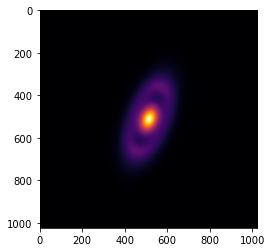

In [35]:
plt.imshow(im2[0].data[:,::-1], cmap='inferno')

In [36]:
img

In [70]:
im2[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WAVE    =                1300. / wavelength [microns]                           
CTYPE1  = 'RA---TAN'                                                            
CRVAL1  =                   0. / RAD                                            
CRPIX1  =                  513                                                  
CDELT1  =        -5.118252E-07 / pixel scale x [deg]                            
CUNIT1  = 'deg     '        